### Import Libraries

In [1]:
"If it does not work use code below while running this notebook in this dir."
import sys
import os
# sys.path.append(os.path.abspath(os.getcwd()))
print(os.getcwd() + "\Desktop\CIHW")
sys.path.append(os.path.abspath(os.getcwd() + "\\Desktop\\CIHW"))
# print(sys.path)

%load_ext autoreload

%autoreload 2
from mytorch import Tensor
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn

import numpy as np
import matplotlib.pyplot as plt

C:\Users\armin\Desktop\CIHW


### Simple Network
here you have to define a simple linear layer to find coefficients of x_i in below problem. <br>
y = ax_1 + bx_2 + cx_3 <br><br>
![simple network.drawio.png](<attachment:simple network.drawio.png>)
<br><br>
weights of this linear layer is your answer. 
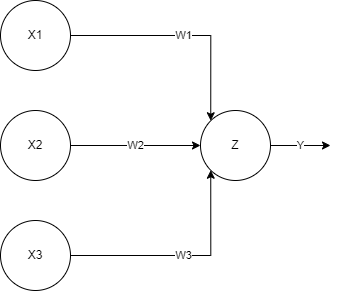

### Generate Data

In [2]:
"TODO: set coefficients"
a = 1
b = 2
c = 3
X = Tensor(np.random.randn(100, 3))
coef = Tensor(np.array([[a], [b], [c]]))
y = X @ coef + 5

### Train Network

In [3]:
from mytorch.optimizer import SGD
%autoreload 2
from mytorch.loss import MeanSquaredError

l = nn.Linear(3, 1, need_bias=True)
"TODO: define an optimizer"
optimizer = SGD([l])
"TODO: print weight and bias of linear layer"
print("initial W and bias:")
print(l.weight)
print(l.bias)
print('================')

batch_size = 20
epLoss = []
for epoch in range(100):
    epoch_loss = 0.0
    for start in range(0, 100, batch_size):
        end = start + batch_size
        inputs = X[start:end]
        # TODO: predicted
        predictions = l.forward(inputs)
        # TODO: calculate MSE loss
        loss = MeanSquaredError(predictions, y[start:end, :])
        # print(loss)
        # TODO: backward
        loss.backward()
        # TODO: add loss to epoch_loss
        epoch_loss += loss.data
        # TODO: update w and b using optimizer
        optimizer.step()
        l.zero_grad()
        # print(f"start={start}, epoch={epoch}")
    epLoss.append(epoch_loss)
    

initial W and bias:
Tensor([[-1.11466265]
 [-0.12402793]
 [-1.71573168]], requires_grad=True)
Tensor([0.], requires_grad=True)
Tensor(84.33956031574851, requires_grad=True)
Tensor(29.208687403481605, requires_grad=True)
Tensor(25.095719037946587, requires_grad=True)
Tensor(10.4484246871707, requires_grad=True)
Tensor(6.190740935120641, requires_grad=True)
Tensor(6.480445320141974, requires_grad=True)
Tensor(1.6383336591593474, requires_grad=True)
Tensor(1.176620206270053, requires_grad=True)
Tensor(0.7052470412199215, requires_grad=True)
Tensor(0.684099493049196, requires_grad=True)
Tensor(0.6933992379658794, requires_grad=True)
Tensor(0.18454998413769044, requires_grad=True)
Tensor(0.08555481598461262, requires_grad=True)
Tensor(0.09986969962334719, requires_grad=True)
Tensor(0.09485158172712614, requires_grad=True)
Tensor(0.09492320109088138, requires_grad=True)
Tensor(0.03147368467410183, requires_grad=True)
Tensor(0.011429152527973423, requires_grad=True)
Tensor(0.01875684782066552

### Evaluate

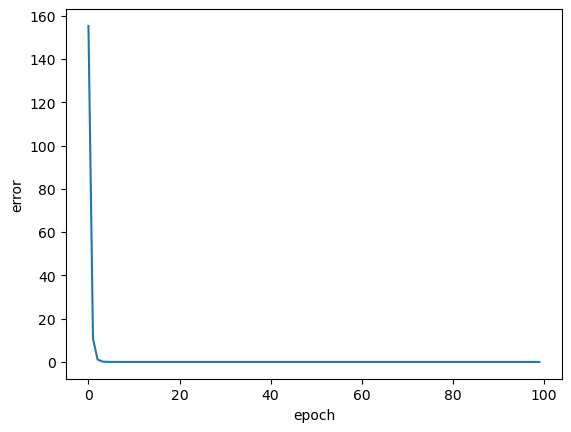


OUT W and bias:
Tensor([[1.]
 [2.]
 [3.]], requires_grad=True)
Tensor([5.], requires_grad=True)


In [4]:
plt.plot(epLoss, label='Error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show();

print("\nOUT W and bias:")
print(l.weight)
print(l.bias)